In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

### Data Pre-processing

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'archive/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [3]:
# For test set
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'archive/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [4]:
#CNN Model

cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation='relu',input_shape=[64,64,3]))

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
#compile

cnn.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = cnn.fit(x = train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
250/250 [==============================] - 35s 136ms/step - loss: 0.6680 - accuracy: 0.5941 - val_loss: 0.6108 - val_accuracy: 0.6730
Epoch 2/5
250/250 [==============================] - 31s 125ms/step - loss: 0.6111 - accuracy: 0.6743 - val_loss: 0.5459 - val_accuracy: 0.7305
Epoch 3/5
250/250 [==============================] - 24s 96ms/step - loss: 0.5601 - accuracy: 0.7126 - val_loss: 0.5810 - val_accuracy: 0.6980
Epoch 4/5
250/250 [==============================] - 24s 96ms/step - loss: 0.5397 - accuracy: 0.7284 - val_loss: 0.5711 - val_accuracy: 0.7100
Epoch 5/5
250/250 [==============================] - 28s 110ms/step - loss: 0.5110 - accuracy: 0.7442 - val_loss: 0.5035 - val_accuracy: 0.7525


In [26]:
#make single prediction
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("archive/dataset/single_prediction/cat_or_dog_2.jpg", target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

In [27]:
prediction

'dog'

In [22]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


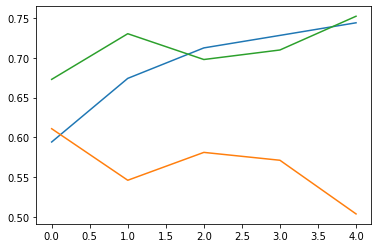

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])